<a href="https://colab.research.google.com/github/jaekyoungkim/tensor2ml_NLP/blob/main/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%99%80_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9C%BC%EB%A1%9C_%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC(ch1_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
!git clone https://github.com/NLP-kr/tensorflow-ml-nlp-tf2.git

Cloning into 'tensorflow-ml-nlp-tf2'...
remote: Enumerating objects: 1720, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 1720 (delta 45), reused 11 (delta 5), pack-reused 1631
Receiving objects: 100% (1720/1720), 201.21 MiB | 21.44 MiB/s, done.
Resolving deltas: 100% (1035/1035), done.
Checking out files: 100% (88/88), done.


# 1. ch1 

In [ ]:
# github저장소에서 파일 받을수 있음
!git clone https://github.com/NLP-kr/tensorflow-ml-nlp-tf2.git

Cloning into 'tensorflow-ml-nlp-tf2'...
remote: Enumerating objects: 1720, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 1720 (delta 45), reused 11 (delta 5), pack-reused 1631
Receiving objects: 100% (1720/1720), 201.21 MiB | 19.48 MiB/s, done.
Resolving deltas: 100% (1035/1035), done.
Checking out files: 100% (88/88), done.


In [ ]:
# pip install <name>
# pip uninstall <name>

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 17.3 MB 152 kB/s 
     |████████████████████████████████| 1.4 MB 53.8 MB/s 
     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 769 kB 39.4 MB/s 
     |████████████████████████████████| 1.0 MB 47.0 MB/s 
     |████████████████████████████████| 47.3 MB 2.8 MB/s 
     |████████████████████████████████| 252 kB 60.0 MB/s 
     |████████████████████████████████| 3.0 MB 37.1 MB/s 
     |████████████████████████████████| 516.2 MB 4.2 kB/s 
     |████████████████████████████████| 2.9 MB 43.8 MB/s 
     |████████████████████████████████| 19.4 MB 12.7 MB/s 
     |████████████████████████████████| 895 kB 66.4 MB/s 
     |████████████████████████████████| 3.0 MB 65.4 MB/s 
     |████████████████████████████████| 454 kB 73.0 MB/s 
     |████████████████████████████████| 86 kB 4.4 MB/s 
     |████████████████████████████████| 448 kB 58.1 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394486 

In [7]:
import tensorflow as tf
from tensorflow.keras import preprocessing
samples= ['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '확상적인데, 정말 좋은거 같아']

In [10]:
labels = [[1],[0],[1],[1],[0],[1]]
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
word_index = tokenizer.word_index

In [11]:
sequences

[[4, 1, 5, 6],
 [7, 1, 8, 9],
 [10, 2, 3, 11],
 [12, 2, 3, 13],
 [14, 1, 15, 16],
 [17, 18, 19, 20]]

In [12]:
word_index

{'같아': 20,
 '기분이': 8,
 '끝내주는데': 10,
 '나': 12,
 '나는': 7,
 '너': 4,
 '더러워': 9,
 '보인다': 6,
 '생겼어': 13,
 '아': 14,
 '오늘': 1,
 '이뻐': 5,
 '일이': 3,
 '있나봐': 11,
 '정말': 18,
 '좋은': 2,
 '좋은거': 19,
 '진짜': 15,
 '짜증나': 16,
 '확상적인데': 17}

In [24]:
from tensorflow.keras import layers
batch_size =2
num_epochs=100
vocab_size = len(word_index) + 1
emb_size=128
hidden_dimension=256
output_dimension= 1

In [29]:
model = tf.keras.Sequential()
model.add(layers.Embedding(vocab_size, emb_size, input_length=4))
model.add(layers.Lambda(lambda x: tf.reduce_mean(x, axis=1)))
model.add(layers.Dense(hidden_dimension, activation ='relu'))
model.add(layers.Dense(output_dimension, activation = 'sigmoid'))


In [26]:
model = tf.keras.Sequential([
layers.Embedding(vocab_size, emb_size, input_length=4),
layers.Lambda(lambda x: tf.reduce_mean(x, axis=1)),
layers.Dense(hidden_dimension, activation='relu'),
layers.Dense(output_dimension, activation='sigmoid')
])

In [30]:
model.compile(optimizer =tf.keras.optimizers.Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [33]:
model.fit(sequences, labels, epochs=num_epochs, batch_size=batch_size)

Epoch 1/100
3/3 [==============================] - 1s 5ms/step - loss: 0.6919 - accuracy: 0.6667
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6724 - accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6556 - accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6403 - accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6221 - accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6032 - accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5795 - accuracy: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 0.5503 - accuracy: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5162 - accuracy: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4809 - accuracy: 1.0000
Epoch 11/100
3/3 [===========

In [41]:
# sequential api 아닌 functional api, subclassing방법으로 동일한 모델을 구현해보기
inputs= layers.Input(shape=(4,))
embed_output = layers.Embedding(vocab_size, emb_size)(inputs)
pooled_output = tf.reduce_mean(embed_output, axis=1)
hidden_layer = layers.Dense(hidden_dimension, activation = 'relu')(pooled_output)
outputs = layers.Dense(output_dimension, activation ='sigmoid')(hidden_layer)
model = tf.keras.Model(inputs=inputs, outputs = outputs)

model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

model.fit(sequences, labels, epochs=num_epochs, batch_size = batch_size)


Epoch 1/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6921 - accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6716 - accuracy: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6537 - accuracy: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.6351 - accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.6148 - accuracy: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 0.5897 - accuracy: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5640 - accuracy: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 0.5286 - accuracy: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 0.4922 - accuracy: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 0.4579 - accuracy: 1.0000
Epoch 11/100
3/3 [===========

In [42]:
# 사이킥런 : 파이썬용 머신러닝 라이브러리, 파이썬으로 머신러닝 모델을 만들수있는 최적의 라이브러리
# 지도학습, 비지도학습, 모델선택 평가, 데이터변환 불러오기, 계산성능향상 모델로 구성됨
# 지도학습 ; 나이브베이즈, dt, svm,
# 비지도학습 : 군집화, 가우시안 혼합모델
# 모델선택 평가모듈 : 교차검증, 모델 평가


In [44]:
pip install scikit-learn

In [3]:
import sklearn
sklearn.__version__ # 1.0.2

'1.0.2'

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris_dataset = load_iris()
print("iris dataset key: {}".format(iris_dataset.keys()))

iris dataset key: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [6]:
iris_dataset['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
iris_dataset['data'].shape

(150, 4)

In [8]:
iris_dataset['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [9]:
iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
iris_dataset['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [12]:
# 사이킥런을 활용한 데이터 분리 
from sklearn.model_selection import train_test_split
train_input, test_input, train_label, test_label = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.25, random_state= 42)

In [13]:
print(train_input.shape)
print(test_input.shape)
print(train_label.shape)
print(test_label.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [64]:
# 사이킥 런을이용한 지도학습
# k-nearest neighbor classifier : 데이터에 대한 가정이 없어 단순, 다목적 분류와 회귀에 좋다. 높은 메모리 요구, k값이 커지면 계산이 늦어짐, 관련없는 기능의 데이터 규모에 민감
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_input, train_label)

KNeighborsClassifier(n_neighbors=1)

In [65]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2 , weights= 'uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=1)

In [68]:
import numpy as np
new_input = np.array([[6.1, 2.8, 4.7, 1.2]])

In [69]:
knn.predict(new_input)

array([1])

In [70]:
predict_label = knn.predict(test_input)
print(predict_label)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [73]:
np.mean(predict_label == test_label)

1.0

In [17]:
# 사이킥런을 이용한 비지도 학습
# k-means clustering, 
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3)
k_means.fit(train_input)
KMeans(algorithm='auto', copy_x = True, init = 'k-means++', max_iter=300, n_clusters=3, n_init=10,random_state=None, tol=0.0001, verbose=0)

KMeans(n_clusters=3)

In [18]:
k_means.labels_

array([1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1,
       1, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2,
       0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 0], dtype=int32)

In [20]:
print("0:", train_label[k_means.labels_==0])  # 0 은 2와 매칭됨
print("1:", train_label[k_means.labels_==1])  # 1은 0과 매칭됨
print("2:", train_label[k_means.labels_==2])  # 2는 1,2섞인거랑 매칭됨

0: [2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2]
1: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2: [2 1 1 1 2 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 2 2 1 2 1]


In [22]:
import numpy as np
new_input = np.array([[6.1, 2.8, 4.7,1.2]])

In [23]:
prediction = k_means.predict(new_input)
print(prediction)

[2]


In [26]:
predict_cluster = k_means.predict(test_input)
print(predict_cluster)
print(test_label)   # 0-2, 1-0, 2-1~2

[2 1 0 2 2 1 2 0 2 2 0 1 1 1 1 2 0 2 2 0 1 2 1 0 0 0 0 0 1 1 1 1 2 1 1 2 2
 1]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [27]:
np_arr = np.array(predict_cluster)
np_arr

array([2, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 1, 2, 0, 2, 2, 0, 1, 2,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1], dtype=int32)

In [28]:
np_arr[np_arr==0], np_arr[np_arr==1], np_arr[np_arr==2] =3,4,5

In [29]:
np_arr[np_arr==3] = 2
np_arr[np_arr==4] = 0
np_arr[np_arr==5] = 1

In [36]:
predict_label =np_arr.tolist()
print(predict_label)
print(test_label)

[1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [43]:
print('test_accuracy {:.2f}'.format(np.mean(predict_label==test_label)))

test_accuracy 0.95


In [44]:
# 사이킥 런을 활용한 특징추출
# countervectorizer : 단어의 빈도수 활용
# tfidfvectorizer : tfidf라는 값을 활용
# hashingvectorizer  : countervectorizer비슷하지만 해시함수를 사용해서 실행시간 크게 줄임
# 세가지 모두 텍스트를 벡터로 만드는 방법


In [45]:
# 1. countervectorizer
# 직관적이고 간단하게 특징 추출, 단순히 횟수만을 특징으로 잡기 떄문에 큰 의미가 없음
# 조사 혹은 지시대명사가 높은 특징값을 가지기 때문에 유의미하게 사용하기 어려움
from sklearn.feature_extraction.text import CountVectorizer
text_data= ['나는 배가 고프다','내일 점심 뭐먹지', '내일 공부 해야겠다.','점심 먹고 공부 해야지']
count_vector = CountVectorizer()
count_vector.fit(text_data)
print(count_vector.vocabulary_)

{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}


In [48]:
sentence = [text_data[0]]  # 나는 배가 고프다
print(count_vector.transform(sentence).toarray())

[[1 0 1 0 0 0 1 0 0 0]]


In [51]:
# 2. tfidfvectorizer
# tf : 한단어가 데이터안에서 등장하는 횟수
# df : 문서 빈도값으로 특정단어가 여러 데이터에 자주 등장하는지를 알려주는 지표
# idf : df값에 역수를 취함, 특정단어가 다른데이터에 등장하지 않을수록 값이 커진다
# tf-idf : tf x idf 어떤 단어가 해당 문서에 자주 등장하지만 다른 문서에는 많이 없는 단어일수록 높은 값을 가지게 된다.
# 조사, 지시대명사 같은 단어는 tf값은 크지만 idf값은 작아지므로 countvectorizer가 가진 문제를 해결 가능
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(text_data)
print(tfidf_vectorizer.vocabulary_)

{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}


In [54]:
sentence = [text_data[3]]
tfidf_vectorizer.transform(sentence).toarray()

array([[0.        , 0.43779123, 0.        , 0.        , 0.55528266,
        0.        , 0.        , 0.43779123, 0.        , 0.55528266]])

In [55]:
# 자연어 토크나이징 도구
# 예측해야할 입력정보를 하나의 특정 기본단위로 자르는것을 토크나이징이라고 한다.
# 영어 토크나이징 라이브러리 : NLTK(Natural Language Toolkit), spacy


In [56]:
# NLTK : 50만개가 넘는 말뭉치 리소스를 활용해 영어 텍스트를 분석할 수 있게 제공 
!pip install NLTK

In [58]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/n

True

In [59]:
from nltk.tokenize import word_tokenize
sentence = 'natural alnguage processing (NLP) is a subfiedl of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data."'

In [60]:
print(word_tokenize(sentence))

['natural', 'alnguage', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfiedl', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.', "''"]


In [61]:
# 문장단위 토크나이징
from nltk.tokenize import sent_tokenize
sentence = 'natural alnguage processing (NLP) is a subfiedl of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. Challengers in natural language processing frequently involve speech recognition , natural language understanding and natural language generation'

In [62]:
print(sent_tokenize(sentence))

['natural alnguage processing (NLP) is a subfiedl of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.', 'Challengers in natural language processing frequently involve speech recognition , natural language understanding and natural language generation']


In [63]:
# nltk내에 불용어 사전이 정의 되어있어 따로 정의할 필요없이 바로 사용가능


In [64]:
# spacy : nltk와 같은 오픈소스 라이브러리 상업용 목적으로 만들어짐, 영어포함한 8개국어에 대한 자연어 전처리 모듈 제공, 빠른속도
!pip install spacy

In [65]:
!python -m spacy download en  #영어 데이터 다운로드받기

     |████████████████████████████████| 12.0 MB 4.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [66]:
# spacy tokenizing
import spacy
nlp =spacy.load('en')
doc= nlp(sentence)

In [67]:
doc

natural alnguage processing (NLP) is a subfiedl of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data. Challengers in natural language processing frequently involve speech recognition , natural language understanding and natural language generation

In [70]:
word_tokenized_sentence = [token.text for token in doc]
sentence_tokenized_list = [sent.text for sent in doc.sents]
print(word_tokenized_sentence)
print(sentence_tokenized_list)
# nltk는 함수를 통해 토크나이징, spacy는 객체를 생성하는 방식으로 구현


['natural', 'alnguage', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfiedl', 'of', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.', 'Challengers', 'in', 'natural', 'language', 'processing', 'frequently', 'involve', 'speech', 'recognition', ',', 'natural', 'language', 'understanding', 'and', 'natural', 'language', 'generation']
['natural alnguage processing (NLP) is a subfiedl of computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.', 'Challengers in natural language 

In [71]:
# 한글 토크나이징 라이브러리 , KONLPY
# 설치방법 : 기존의 자바로 쓰여진 형태소 분석기를 사용 -> 1.7이상 버전의 자바가 설치돼있어야함
# [제어판] - [프로그램및 기능] -java검색-자바 홈페이지에서 다운로드 - 커맨드창 java -version 버전체크함
# 환경변수 설정해줘야함 
# 0.5.7 버전 이상의 JPype1 설치 : konlpy에서 필요하며, 파이썬에서 자바 클래스를 사용할 수 있도록 해주는 라이브러리


In [74]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 448 kB 48.3 MB/s 


In [75]:
import konlpy

In [77]:
# konlpy는 다양한 형태소 분석기를 제공함, 각 형태소 분석기별로 분석한 결과는 다를 수 있음
# 형태소 단위 토크나이징 : hannanum, kkma, komoran, mecab, okt(twitter)
# mecab은 윈도우에서 사용불가
from konlpy.tag import Okt

In [78]:
okt= Okt()
text= "한글 자연어 처리는 재밌다 이제부터 열심히 해야지 ㅎㅎㅎ"
print(okt.morphs(text))

['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '해야지', 'ㅎㅎㅎ']


In [80]:
print(okt.morphs(text, stem=True)) # stem = true 원형을 뽑아냄

['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '하다', 'ㅎㅎㅎ']


In [82]:
print(okt.nouns(text)) # 명사만 추출
print(okt.phrases(text)) # 어절 단위로 나뉘어서 추출

['한글', '자연어', '처리', '이제']
['한글', '한글 자연어', '한글 자연어 처리', '이제', '자연어', '처리']


In [83]:
print(okt.pos(text))


[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야지', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]


In [84]:
print(okt.pos(text, join=True)) # 형태소와 품사를 붙여서 리스트화

['한글/Noun', '자연어/Noun', '처리/Noun', '는/Josa', '재밌다/Adjective', '이제/Noun', '부터/Josa', '열심히/Adverb', '해야지/Verb', 'ㅎㅎㅎ/KoreanParticle']


In [85]:
# 데이터 : kolaw, kobill ...

In [86]:
from konlpy.corpus import kolaw
from konlpy.corpus import kobill

In [87]:
kolaw.open('constitution.txt').read()[:20]

'대한민국헌법\n\n유구한 역사와 전통에 '

In [92]:
kobill.open('1809890.txt').read()

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [93]:
# 그밖의 라이브러리
# numpy : 계산을 도와줌 , 빠르고 효율적인 계산위해 필요,  핵심은ndarray객체(동일한 자료형을 가지는 n차원의 배열)
import numpy as np
a= np.array([1,2,3])
print(a)

[1 2 3]


In [97]:
a = np.array([[1,2,3],[1,5,9],[3,5,7]])
print(a)
print(a.ndim) # 2차원
print(a.shape) # 3.3
print(a.size) # 9개 원소
print(a.dtype)

[[1 2 3]
 [1 5 9]
 [3 5 7]]
2
(3, 3)
9
int64


In [98]:
a= np.zeros((2,3))
print(a)

[[0. 0. 0.]
 [0. 0. 0.]]


In [100]:
b=np.ones((2,1))
print(b)

[[1.]
 [1.]]


In [102]:
c= np.empty((2,2))
print(c)

[[0.43779123 0.55528266]
 [0.43779123 0.55528266]]


In [103]:
d=np.arange(10,30,5) # 10~30까지 5단위
print(d)

[10 15 20 25]


In [105]:
e=np.full((2,2),4)
print(e)

[[4 4]
 [4 4]]


In [106]:
f= np.eye(3)
print(f)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [107]:
g=np.random.random((2,2))
print(g)

[[0.54114341 0.10698518]
 [0.41898004 0.7030493 ]]


In [111]:
# numpy기본연산
a= np.array([1,2,3])
b= np.array([10,20,30])
print(a+b)
print(np.add(a,b))
print(b-a)
print(np.subtract(b,a))
print(a**2)
print(b<15)

[11 22 33]
[11 22 33]
[ 9 18 27]
[ 9 18 27]
[1 4 9]
[ True False False]


In [112]:
c= np.array([[1,2],[3,4]])
d= np.array([[10,20],[30,40]])
print(c*d) # 원소별 곱
print(np.dot(c,d)) # 내적 계산
print(c.dot(d)) # 내적 계산

[[ 10  40]
 [ 90 160]]
[[ 70 100]
 [150 220]]
[[ 70 100]
 [150 220]]


In [115]:
a = np.array([[1,2,3,4],[5,6,7,8],[1,3,5,7]])
print(a)
print(a.sum(axis=0)) # 열 합
print(a.sum(axis=1)) # 행 합
print(a.max(axis=1)) #각 행에서 최대값

[[1 2 3 4]
 [5 6 7 8]
 [1 3 5 7]]
[ 7 11 15 19]
[10 26 16]
[4 8 7]


In [117]:
# 넘파이 배열 인덱싱, 슬라이싱
a= np.array([1,2,3,4,5,6,7])
print(a[3])
print(a[-1]) # 가장 마지막 원소
print(a[2:5]) 
print(a[2:])
print(a[:4])


4
7
[3 4 5]
[3 4 5 6 7]
[1 2 3 4]


In [120]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)
print(a[1,2]) # 2행 3열
print(a[:,1]) # 2열 258
print(a[-1]) # [789] 마지막값


[[1 2 3]
 [4 5 6]
 [7 8 9]]
6
[2 5 8]
[7 8 9]


In [122]:
# numpy 를 이용한 배열 형태 변환
# ravel :  배열을 1차원 배열론 만들기
# reshape : 배열의 형태를 바꿈
# ndarray.T : 트랜스포즈된 행렬
a = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(a.ravel()) # 1차원으로 풀어씀
print(a.reshape(2,6))
print(a.T)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]


In [126]:
# NUMPY 브로드캐스팅
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b= np.array([1,0,1])
y= np.empty_like(a) #배열 a와 크기가 같은 원소가 비어있는 배열 생성
print(y)
for i in range(3):
  y[i:] = a[i,:] +b
print(y)
# for문은 속도가 매우 느려질수있음, 브로드 캐스팅을 사용하면 반복문 없이 매우 간단하게 계산

[[94081506277552 94081524314416              0]
 [             0              0              0]
 [             0              0              0]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]]


In [128]:
a= np.array([[1,2,3],[4,5,6],[7,8,9]])
b= np.array([1,0,1])
c =a+b  # b를 반복적으로 선언할필요없이 만들 수 있다.
print(c)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]]


In [129]:
# 판다스 pandas 
import pandas as pd
# pandas 구조, 데이터 구조와 분석기능을 제공
# series, dataframe, panel로 구성
# series : 1차원구조
# dataframe : 2차원
# panel : 3차원

In [131]:
# 시리즈 생성
# pd.Series(data, index, dtype, copy) 형태
a = pd.Series([1,3,5,7,10])
print(a) # index와 함께 값이 나옴

0     1
1     3
2     5
3     7
4    10
dtype: int64


In [133]:
data = np.array(['a','b','c','d'])
b=pd.Series(data)
print(b)

0    a
1    b
2    c
3    d
dtype: object


In [135]:
c= pd.Series(np.arange(10,30,5))
print(c)

0    10
1    15
2    20
3    25
dtype: int64


In [137]:
# index 값을 바꿔줌
dict = {'a':10,'b':20,'c':30}
d=pd.Series(dict)
print(d)

a    10
b    20
c    30
dtype: int64


In [138]:
# DATA FRAME
a= pd.DataFrame([1,3,5,7,9])
print(a)

   0
0  1
1  3
2  5
3  7
4  9


In [139]:
dict = {'name' : ['cho','kim','lee'], 'age':[28,41,39]}
b= pd.DataFrame(dict)
print(b)

  name  age
0  cho   28
1  kim   41
2  lee   39


In [142]:
c= pd.DataFrame([['apple',7000],['banana',3000],['orange', 3000]])
print(c)

        0     1
0   apple  7000
1  banana  3000
2  orange  3000


In [145]:
# 컬럼 인덱스에 단어 넣기
c= pd.DataFrame([['apple',7000],['banana',3000],['orange', 3000]], columns=['name','price'])
print(c)

     name  price
0   apple   7000
1  banana   3000
2  orange   3000


In [148]:
# pd.read_csv('file_path')
df = pd.read_csv('tensorflow-ml-nlp-tf2/2.NLP_PREP/data_in/datafile.csv')
print(df)

     Unnamed: 0         A         B    C
0    2018-02-03  0.076547 -0.410959  824
1    2018-02-04  0.810574  0.988997  255
2    2018-02-05  0.071555  0.772209  859
3    2018-02-06  0.319684  0.760100  551
4    2018-02-07  0.571791  0.162974  159
..          ...       ...       ...  ...
295  2018-11-25  0.961260 -0.160928  772
296  2018-11-26  0.412032  0.739386  171
297  2018-11-27  0.934486  0.496985  925
298  2018-11-28  0.072067  0.697545  919
299  2018-11-29  0.705263 -0.866304  146

[300 rows x 4 columns]


In [149]:
print(df['A'])

0      0.076547
1      0.810574
2      0.071555
3      0.319684
4      0.571791
         ...   
295    0.961260
296    0.412032
297    0.934486
298    0.072067
299    0.705263
Name: A, Length: 300, dtype: float64


In [150]:
df['D'] = df['A'] + df['B']

In [151]:
df

,Unnamed: 0,A,B,C,D
0,2018-02-03,0.076547,-0.410959,824,-0.334412
1,2018-02-04,0.810574,0.988997,255,1.799571
2,2018-02-05,0.071555,0.772209,859,0.843764
3,2018-02-06,0.319684,0.760100,551,1.079784
4,2018-02-07,0.571791,0.162974,159,0.734765
...,...,...,...,...,...
295,2018-11-25,0.961260,-0.160928,772,0.800332
296,2018-11-26,0.412032,0.739386,171,1.151419
297,2018-11-27,0.934486,0.496985,925,1.431471
298,2018-11-28,0.072067,0.697545,919,0.769612


In [152]:
df.describe()

,A,B,C,D
count,300.000000,300.000000,300.000000,300.000000
mean,0.504467,0.120235,517.743333,0.624702
std,0.283837,0.576256,283.187160,0.656320
min,0.003110,-0.981417,0.000000,-0.890799
25%,0.241881,-0.336614,282.250000,0.100411
50%,0.528009,0.224035,526.500000,0.767702
75%,0.750084,0.591710,754.250000,1.141083
max,0.994491,0.989536,996.000000,1.857518


In [153]:
# matplotlib : 데이터 분석 시 시각화를 위한 라이브러리
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matpotlib inline # 주피터 노트북 내에서 그림을 표시하는 방법

UsageError: Line magic function `%matpotlib` not found.


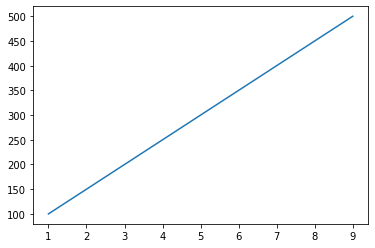

In [155]:
X= [1,3,5,7,9]
Y= [100,200,300,400,500]
plt.plot(X,Y)

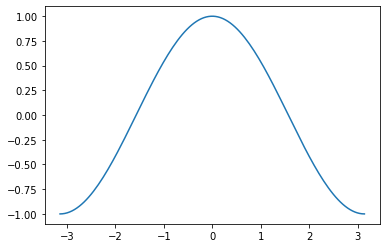

In [156]:
#  cosine 
x= np.linspace(-np.pi, np.pi, 128)
y= np.cos(x)
plt.plot(x,y)

In [157]:
data_frame = pd.read_csv('tensorflow-ml-nlp-tf2/2.NLP_PREP/data_in/datafile.csv')

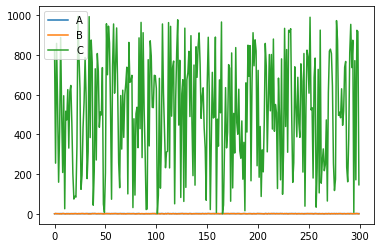

In [158]:
data_frame.plot()

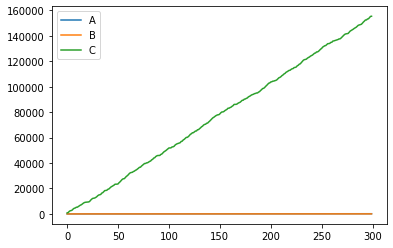

In [159]:
# cumulative 
data_sum = data_frame.cumsum()
data_sum.plot()

In [163]:
# re : 파이썬 정규 표현식 라이브러리
# 파이썬내장 라이브러리로, 별다른 설치 필요없음
import re
pattern = ' \W+'  # \w: 문자혹은 숫자, \W : 문자혹은 숫자가 아닌것
re_pattern = re.compile(pattern)
re.search( "(\w+)", "wow, it is awesome")

<re.Match object; span=(0, 3), match='wow'>

In [166]:
re.split('\W', 'wow, it is world of word') # 띄어쓰기를 기준으로 문장을 나눈것을 알 수 있음

['wow', '', 'it', 'is', 'world', 'of', 'word']

In [167]:
re.sub("\d", "number", "7 candy")   # 숫자를 number로 바꾸기 , \d : 숫자,  \D : 숫자가 아닌 문자

'number candy'

In [169]:
# BS4 : 웹크롤링에 사용되는 라이브러리, HTML문서 혹은 XML문서에서 데이터를 불러오는데 사용
from bs4 import BeautifulSoup
str= '<body> 이 글은 beautiful soup 라이브러리를 사용하는 방법에 대한 글입니다. <br></br> 라이브러리를 사용하면 쉽게 html 태그를 제거할 수 있습니다.</body>'
str = BeautifulSoup(str,"html5lib").get_text() # html태그를 제외한 텍스트만 가져오기
print(str)


 이 글은 beautiful soup 라이브러리를 사용하는 방법에 대한 글입니다.  라이브러리를 사용하면 쉽게 html 태그를 제거할 수 있습니다.


In [170]:
!pip install kaggle
# 위치 : c:/users/사용자명/.kaggle ,       $ /사용자홈디렉토리/.kaggle
# $ kaggle competitions download -c <competition-name>  # 데이터 다운
# $ kaggel competitions files -c <competition-name>  # 데이터 목록 확인
# $ kaggle competitions submit <competition-name> -f <file-name -m <message>  # 제출
# $ kaggle competitions list  # 대회목록

  # 새 섹션

# 새 섹션

# 새 섹션

# 부록

##### 3. 시퀀스 투 시퀀스

In [ ]:
# 기계번역, 텍스트 요약, 이미지 설명, 대화모델등에 사용됨
# RNN을 기반으로 함, 인코더 디코더로 나뉨
# 

##### 4. 트랜스포머 

In [ ]:
## 04 트랜스포머 네트워크 : 기존의 rnn, cnn을 기반으로 구성된 모델과 다르게 단순히 어텐션 구조만으로 전체모델을 만들어 어텐션 기법의 중요성을 강조

In [ ]:
# 특징 
# - 셀프 어텐션 기법을 사용해 문장에 대한 정보를 추출, 
# - 셀프 어텐션 : 문장에서 각 단어끼리 얼마나 관계가 있는지를 계산해서 반영하는 방법, 문장안에서 단어들 간의 관계를 측정할 수 있음
# - attention score : 관계도가 큰 단어 간의 어텐션 점수는 높게 나올 것, 텍스트 유사도 구하는 방식과 유사 / 맨하탄 거리와 같은 유사도 공식을 활용해 구하는 방법과 dense층을 거쳐 나온 값을 활용하는 방법이 있음
# 트랜스포머 모델에서는 단어벡터끼리 내적 연산을 함으로써 attention score를 구함
# - attention map : attention score를 하나의 테이블로 만든것


In [ ]:
# 특정단어에 대해서 attention score를 구함 -> softmax 함수를 가지고 확률값으로 표현 -> 어텐션 스코어와 각 단어 벡터와 상수곱 연산 -> 상수곱을 한 단어벡터들에 대해서 더함 : 해당 단어에 대한 CONTEXT VECTOR
# 셀프 어텐션은 트랜스포머 네트워크 핵심, 어텐션 기법이 적용된 문맥 벡터가 생성됨

In [ ]:
# configs.py 폴더 만들고 아래내용 넣기
tf.app.flags.DEFINE_integer('model_hidden_size',128,'model weights size')
